 <h1><center> <font color='green'>Extracción de las características del color de las vocales  </font></center></h1> 


 <h1><center> <font color='blue'>Librerías</font></center></h1> 


In [1]:
'''Librerías para realizar varias operaciones simples en imágenes'''
from  PIL  import Image
import cv2
'''Librería para calculo numerico'''
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '5' 
'''Librerías para operaciones en archivos'''
import shutil
import glob
'''Librerías para el analisis de datos'''
import pandas as pd
'''Librerías para gráficas'''
import matplotlib.pyplot as plt
import seaborn as sn
'''Librerías para redes neuronales'''
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img ,  img_to_array , load_img
from sklearn.preprocessing import MinMaxScaler
'''Librería para  formato de datos jerárquico que se usa en el NILMTK como fuente datos'''
import h5py
'''Librería para el tiempo'''
from time import sleep

 <h1><center> <font color='orange'>Carga y visualización del DataSet</font></center></h1> 

In [2]:
'''Carga del DataSet'''
images_path = "./vocales"
class_names = os.listdir(images_path)
class_names.sort()
print(class_names)

['a', 'e', 'i', 'o', 'u']


In [3]:
"""Funcion para cargar las imagenes por categorias"""

def load_images_and_labels(class_names):
    img_lst=[]
    labels=[]
    for index, category in enumerate(class_names):
        for image_name in os.listdir(images_path+"/"+category):
            img = cv2.imread(images_path+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (224, 224))
            img_array = Image.fromarray(img, 'RGB')
            
            img_lst.append(np.array(img_array))
            
            labels.append(index)
    return img_lst, labels
"""Cargar las imagenes desde las categorias"""
images, labels = load_images_and_labels(class_names)
"""Mostrar la cantidad de imagenes cargadas"""
print("Nº de imágenes cargadas = ",len(images),"\nNº de etiquetas cargadas = ",len(labels))
print(type(images),type(labels))

Nº de imágenes cargadas =  1000 
Nº de etiquetas cargadas =  1000
<class 'list'> <class 'list'>


In [4]:
"""Variables para ver el array de las imagenes y los label"""
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (1000, 224, 224, 3) 
Labels shape =  (1000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


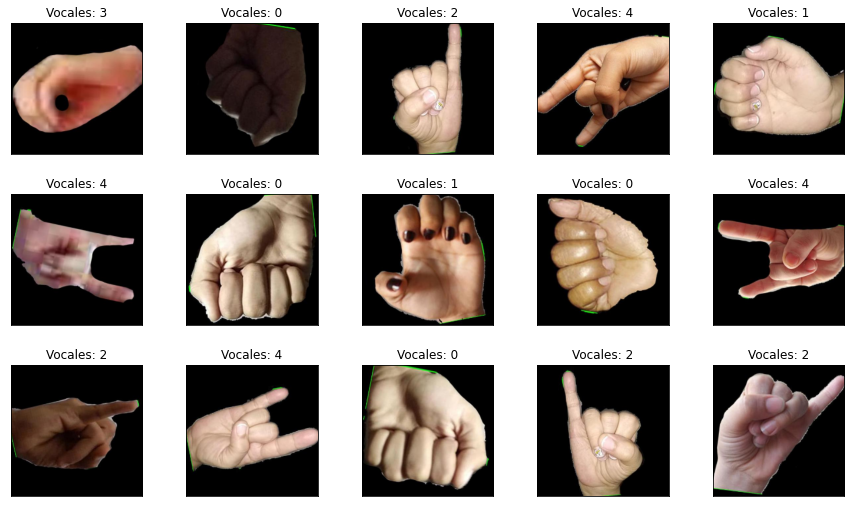

In [5]:
"""Función para visualizar imagenes aleatorias """
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (15 , 15))
    n = 0 
    for i in range(15):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(5 , 5 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Vocales: {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
"""Mostrar imagenes con sus labels"""   
display_rand_images(images, labels)

 <h1><center> <font color='purple'>Extracción de las características del color</font></center></h1> 

In [6]:
"""Método para la extracción de las características de color en Histograma"""
def fd_histogram(image, mask=None):
    '''convertir la imagen a espacio de color HSV'''
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    '''calcular el histograma de color'''
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    '''normalizar el histograma'''
    cv2.normalize(hist, hist)
    return hist.flatten()

In [7]:
'''Definimos los arrays de las características de color y de las etiquetas'''
color_features = []
color_features_labels   = []

In [8]:
print("[ESTADO]Extracción de características de color:")
for class_name in class_names:
    cur_path = images_path + "/" + class_name
    cur_label = class_name
    i = 1

    for file in glob.glob(cur_path + "/*.jpg"):
        print("Imagen Procesada- {} in {}".format(i, cur_label))
      
        image = cv2.imread(file)

    
        bins = 8
        hist = fd_histogram(image)

   
        color_features.append(hist)
        color_features_labels.append(cur_label)

    
        i += 1

[ESTADO]Extracción de características de color:
Imagen Procesada- 1 in a
Imagen Procesada- 2 in a
Imagen Procesada- 3 in a
Imagen Procesada- 4 in a
Imagen Procesada- 5 in a
Imagen Procesada- 6 in a
Imagen Procesada- 7 in a
Imagen Procesada- 8 in a
Imagen Procesada- 9 in a
Imagen Procesada- 10 in a
Imagen Procesada- 11 in a
Imagen Procesada- 12 in a
Imagen Procesada- 13 in a
Imagen Procesada- 14 in a
Imagen Procesada- 15 in a
Imagen Procesada- 16 in a
Imagen Procesada- 17 in a
Imagen Procesada- 18 in a
Imagen Procesada- 19 in a
Imagen Procesada- 20 in a
Imagen Procesada- 21 in a
Imagen Procesada- 22 in a
Imagen Procesada- 23 in a
Imagen Procesada- 24 in a
Imagen Procesada- 25 in a
Imagen Procesada- 26 in a
Imagen Procesada- 27 in a
Imagen Procesada- 28 in a
Imagen Procesada- 29 in a
Imagen Procesada- 30 in a
Imagen Procesada- 31 in a
Imagen Procesada- 32 in a
Imagen Procesada- 33 in a
Imagen Procesada- 34 in a
Imagen Procesada- 35 in a
Imagen Procesada- 36 in a
Imagen Procesada- 37 in a

Imagen Procesada- 120 in e
Imagen Procesada- 121 in e
Imagen Procesada- 122 in e
Imagen Procesada- 123 in e
Imagen Procesada- 124 in e
Imagen Procesada- 125 in e
Imagen Procesada- 126 in e
Imagen Procesada- 127 in e
Imagen Procesada- 128 in e
Imagen Procesada- 129 in e
Imagen Procesada- 130 in e
Imagen Procesada- 131 in e
Imagen Procesada- 132 in e
Imagen Procesada- 133 in e
Imagen Procesada- 134 in e
Imagen Procesada- 135 in e
Imagen Procesada- 136 in e
Imagen Procesada- 137 in e
Imagen Procesada- 138 in e
Imagen Procesada- 139 in e
Imagen Procesada- 140 in e
Imagen Procesada- 141 in e
Imagen Procesada- 142 in e
Imagen Procesada- 143 in e
Imagen Procesada- 144 in e
Imagen Procesada- 145 in e
Imagen Procesada- 146 in e
Imagen Procesada- 147 in e
Imagen Procesada- 148 in e
Imagen Procesada- 149 in e
Imagen Procesada- 150 in e
Imagen Procesada- 151 in e
Imagen Procesada- 152 in e
Imagen Procesada- 153 in e
Imagen Procesada- 154 in e
Imagen Procesada- 155 in e
Imagen Procesada- 156 in e
I

Imagen Procesada- 53 in o
Imagen Procesada- 54 in o
Imagen Procesada- 55 in o
Imagen Procesada- 56 in o
Imagen Procesada- 57 in o
Imagen Procesada- 58 in o
Imagen Procesada- 59 in o
Imagen Procesada- 60 in o
Imagen Procesada- 61 in o
Imagen Procesada- 62 in o
Imagen Procesada- 63 in o
Imagen Procesada- 64 in o
Imagen Procesada- 65 in o
Imagen Procesada- 66 in o
Imagen Procesada- 67 in o
Imagen Procesada- 68 in o
Imagen Procesada- 69 in o
Imagen Procesada- 70 in o
Imagen Procesada- 71 in o
Imagen Procesada- 72 in o
Imagen Procesada- 73 in o
Imagen Procesada- 74 in o
Imagen Procesada- 75 in o
Imagen Procesada- 76 in o
Imagen Procesada- 77 in o
Imagen Procesada- 78 in o
Imagen Procesada- 79 in o
Imagen Procesada- 80 in o
Imagen Procesada- 81 in o
Imagen Procesada- 82 in o
Imagen Procesada- 83 in o
Imagen Procesada- 84 in o
Imagen Procesada- 85 in o
Imagen Procesada- 86 in o
Imagen Procesada- 87 in o
Imagen Procesada- 88 in o
Imagen Procesada- 89 in o
Imagen Procesada- 90 in o
Imagen Proce

Imagen Procesada- 189 in u
Imagen Procesada- 190 in u
Imagen Procesada- 191 in u
Imagen Procesada- 192 in u
Imagen Procesada- 193 in u
Imagen Procesada- 194 in u
Imagen Procesada- 195 in u
Imagen Procesada- 196 in u
Imagen Procesada- 197 in u
Imagen Procesada- 198 in u
Imagen Procesada- 199 in u
Imagen Procesada- 200 in u


In [9]:
'''Obtenemos el tamaño general del vector de características'''
print("[ESTADO] tamaño de vector de característica de color: {}".format(np.array(color_features).shape))

[ESTADO] tamaño de vector de característica de color: (1000, 512)


In [10]:
'''Obtenemos el tamaño total de la etiqueta de entrenamiento'''
print("[STATUS] etiquetas de entrenamiento: {}".format(np.array(color_features_labels).shape))

[STATUS] etiquetas de entrenamiento: (1000,)


In [11]:
'''Codificación de las etiquetas de destino'''
print("[STATUS] Comenienzo de la codificación de etiquetas de entrenamiento")
def replace(my_list, my_dict):
    return [x if x not in my_dict else my_dict[x] for x in my_list]

labels_dict = {'a': 0, 'e': 1, 'i': 2,'o':3,'u':4}
target = replace(color_features_labels, labels_dict)

print("[STATUS] etiquetas de entrenamiento codificadas.")

[STATUS] Comenienzo de la codificación de etiquetas de entrenamiento
[STATUS] etiquetas de entrenamiento codificadas.


In [12]:
'''características de escala en el rango (0-1)'''
scaler            = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(color_features)
print("[ESTADO] vector de características normalizado:")
print("[STATUS] etiquetas de destino: {}".format(np.array(target)))
print("[STATUS] forma de las etiquetas de destino: {}".format(np.array(target).shape))

[ESTADO] vector de características normalizado:
[STATUS] etiquetas de destino: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 

In [14]:
'''Guardamos  el vector de características usando HDF5'''
h5f_data = h5py.File(r'C:\Users\Joelv\Documents\Mineria de Datos\U3\Proyecto\COMPUTER VISION- RECOGNITION OF VOWELS IN SIGN LANGUAGE\CaracteristicasVocales\Color\caracteristicas_color.h5', 'w')
h5f_data.create_dataset('Caracteristicas_Color_Vocales', data=np.array(rescaled_features))

h5f_label = h5py.File(r'C:\Users\Joelv\Documents\Mineria de Datos\U3\Proyecto\COMPUTER VISION- RECOGNITION OF VOWELS IN SIGN LANGUAGE\CaracteristicasVocales\Color\caracteristicas_etiquetas_color.h5', 'w')
h5f_label.create_dataset('Caracteristicas_Etiquetas_Vocales', data=np.array(target))

h5f_data.close()
h5f_label.close()

print("[STATUS] extracción de características de color finalizado")

[STATUS] extracción de características de color finalizado
